# **Results**

### Basic setup:

In [2]:
# magics
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules
from model import model_bufferstock

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/67/5lclr44x13d7lzxtqq4c11r40000gn/T/ipykernel_1692/1937956135.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### 1. Run model for different values of $\lambda$:

In [26]:
# Load baseline settings
model = model_bufferstock()

model.life_cycle_setup()

In [38]:
lambdas = [0.0000000183,0.0000000163,0.0000000143,0.0000000123]
results = []

# loop over lambda and solve model
for value in lambdas:
    
    model.par.lambdaa = value
    model.create_grids()
    model.solve()
    print(model.par.a_min[5])

    results.append([model.sol.m, model.sol.c]) # save the results

[-1.83898933e-08]
[-1.83898933e-08]
[-1.83898933e-08]
[-1.83898933e-08]


### Somehow different $\lambda$ does not impact results?

In [34]:
print(results[0][0][60-model.par.age_min-1,:]-results[1][0][60-model.par.age_min-1,:]) 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Plot the solution for each $\lambda$:

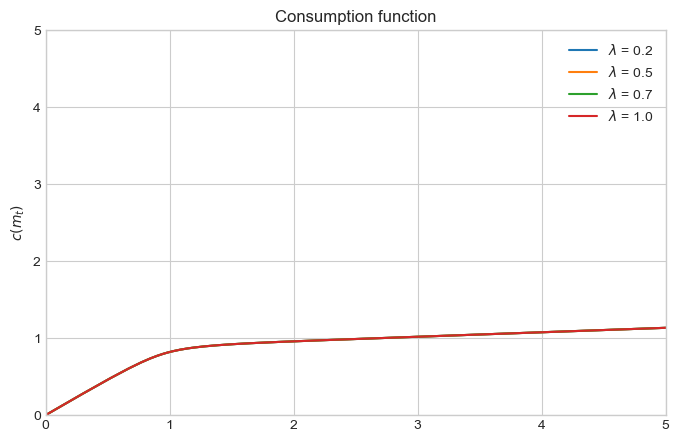

In [35]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

for value,(i,result) in zip(lambdas, enumerate(results)):
    ax.plot(results[i][0][60-model.par.age_min-1,:],results[i][1][60-model.par.age_min-1,:], label=f'$\lambda$ = {value}')

ax.set_ylabel(f"$c(m_t)$")
ax.set_xlim([np.min(model.par.a_min), 5])
ax.set_title(f'Consumption function')
ax.set_ylim([0,5])

plt.legend()
plt.show()